# Linear Regression Model 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import r2_score,mean_squared_error

In [2]:
#Read data
df = pd.read_csv('Advertising.csv')

In [3]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [9]:
#Rename the column Unnamed: 0 to a
df.rename({"Unnamed: 0":"a"}, axis="columns", inplace = True)
df.head() 

,a,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [10]:
#Deleting the column a
df.drop(["a"], axis=1, inplace=True)

In [11]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [12]:
df.shape

(200, 4)

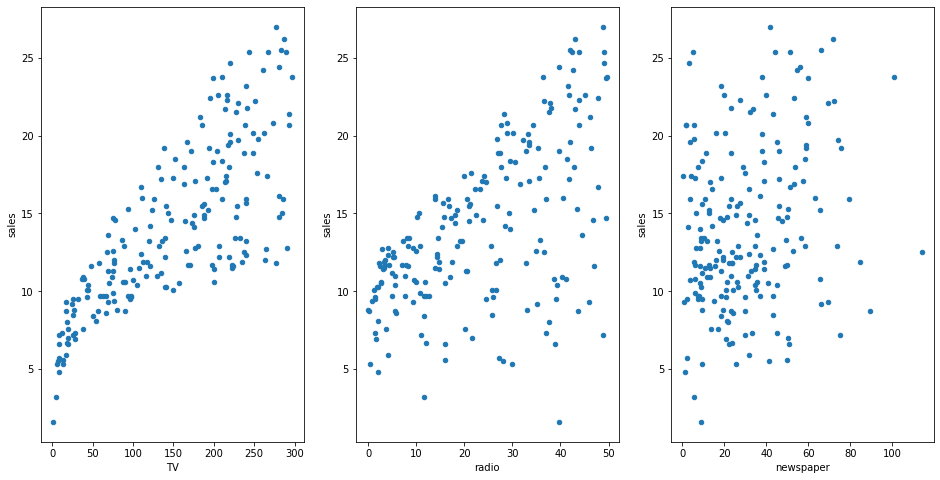

In [13]:
#Plot the data with independent variable x
fig,axs = plt.subplots(1,3)
df.plot(kind='scatter',x='TV',y='sales',figsize=(16,8),ax=axs[0])
df.plot(kind='scatter',x='radio',y='sales',figsize=(16,8),ax=axs[1])
df.plot(kind='scatter',x='newspaper',y='sales',figsize=(16,8),ax=axs[2])

In [14]:
#Using Linear Regression from sklearn
from sklearn.linear_model import LinearRegression

In [15]:
#creating object of linear model
lm = LinearRegression()

In [16]:
#taking values of x and y for regression
x = df[['TV']]
y=df.sales

In [17]:
#Train the model 
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# formula
    y = mx + c
    m = coefficient
    c = intercept term
    

In [18]:
#predict the value for 50
lm.intercept_

7.032593549127695

In [19]:
lm.coef_

array([0.04753664])

In [20]:
(50*lm.coef_) + lm.intercept_

array([9.40942557])

In [21]:
#Other method for predict
x_ = pd.DataFrame({'TV':[50]})

In [22]:
x_

,TV
0,50


In [23]:
lm.predict(x_)

array([9.40942557])

In [24]:
#Predict with min and max value
x.TV.min(), x.TV.max()

(0.7, 296.4)

In [25]:
X_new = pd.DataFrame({'TV':[df.TV.min(),df.TV.max()]})

In [26]:
X_new

,TV
0,0.7
1,296.4


In [27]:
x_predicted = lm.predict(X_new)

In [28]:
x_predicted

array([ 7.0658692 , 21.12245377])

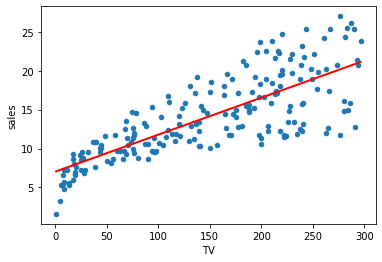

In [29]:
#Plot the predicted data
df.plot(kind='scatter',x='TV',y='sales')
plt.plot(X_new,x_predicted,c='red',linewidth=2)

In [30]:
#importing statsmodel library
import statsmodels.formula.api as smf

In [31]:
#ols - ordinary least square model
lm = smf.ols(formula='sales~TV',data=df).fit()

In [32]:
#finding coefficient
lm.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [33]:
# pvalue for comparision and accepting/rejecting huypothesis
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [34]:
# R-Squared value
lm.rsquared

0.611875050850071

In [35]:
lm2 = smf.ols(formula='sales~TV+radio+newspaper',data=df).fit()

In [36]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 19 May 2020   Prob (F-statistic):           1.58e-96
Time:                        12:40:47   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Summary
    Here p value of news paper is >0.05. so there is no relationship between newspaper and sales. so reject it.
    so remove newspaper

# Multiple regression model

    here use feature engineering to remove the unnessary column for prediction i.e. newspaper

In [37]:
feature_cols = ['TV','radio']
X = df[feature_cols]
Y= df.sales

In [38]:
X.head()

,TV,radio
0,230.1,37.8
1,44.5,39.3
2,17.2,45.9
3,151.5,41.3
4,180.8,10.8


In [39]:
Y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [40]:
#importing train-test split
from sklearn.model_selection import train_test_split

In [41]:
#use train-test split function for predicting on train and test data
#train data 70% & testing data 30%

xtrain,xtest,ytrain,ytest= train_test_split(X,Y,test_size=0.30)

In [43]:
xtrain.shape

(140, 2)

In [44]:
xtest.shape

(60, 2)

In [46]:
ytrain.shape

(140,)

In [47]:
ytest.shape

(60,)

In [48]:
#creating object
lm = LinearRegression()

In [49]:
#train data with xtrain and ytrain
lm.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
#predicted value

print(lm.intercept_)
print(lm.coef_)
p=lm.predict(xtest)



3.0301509337453982
[0.04610174 0.17874214]


In [52]:
#mean square error(MSE)
print(mean_squared_error(ytest,p))

2.6982001949428653
